In [2]:
import glob, os
import numpy as np
import tensorflow.keras as keras

import matplotlib.pyplot as plt

from tensorflow.keras.preprocessing.image import load_img
from tensorflow.keras.utils import img_to_array
from tensorflow.keras.layers import BatchNormalization, Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.models import Sequential
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras import backend as K

from tensorflow.keras.utils import to_categorical

In [ ]:
### Task:
# this is essentially the same script as 'CNN thing' but it tries to use the 
# pre-trained image model "VGG16" as an input and only retrains the dense layers at the end of the model.

In [3]:
os.chdir('../data')
os.getcwd()

'C:\\Users\\Philipp\\Documents\\SPICED\\deep\\data'

In [4]:
X = []
y = []
classes_raw = os.listdir()
classes = [x for x in classes_raw if not x.endswith('.md')]

for i, target in enumerate(classes):
      files = os.listdir(os.getcwd() + '/' + target)
      for file in files:
        file_path = os.getcwd() + '/' + target + '/' + file
        img = load_img(file_path, grayscale=False)
        # convert it to an array
        img_array = img_to_array(img)
        # append the array to X
        X.append(img_array)
        # append the numeric target to y
        y.append(target)

X = np.array(X, dtype='i8')
y = np.array(y)

# shuffle the data
shuffler = np.random.permutation(len(X))
X = X[shuffler]
y = y[shuffler]

X.shape, y.shape

((1503, 224, 224, 3), (1503,))

In [5]:
classes

['airpods',
 'airpodspro',
 'applebatterypack',
 'book',
 'brushes',
 'can',
 'coins',
 'cup',
 'empty',
 'pen',
 'rolls',
 'usb_charger']

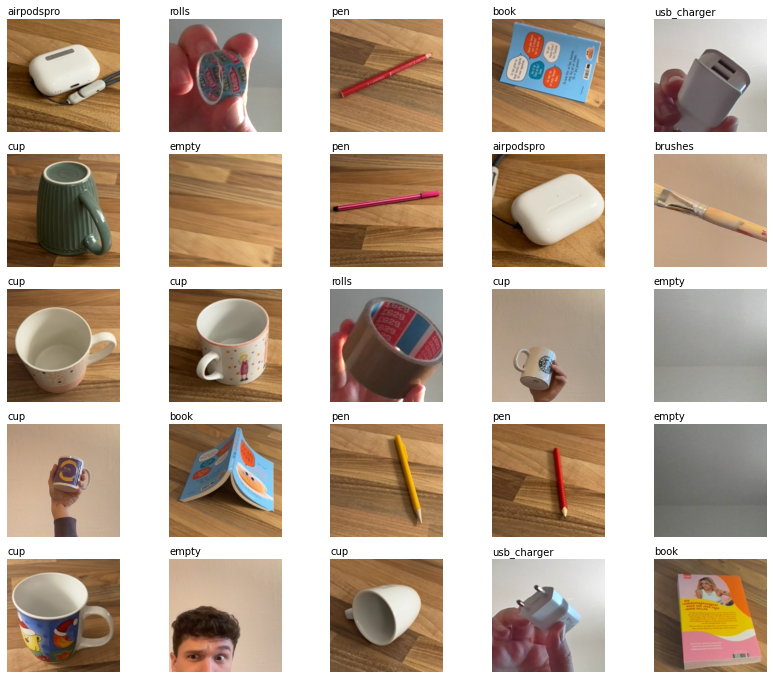

In [6]:
plt.rcParams['figure.figsize'] = [14, 12]

for i in range(25):
    plt.subplot(5, 5, i+1)
    plt.imshow(X[i])
    plt.axis('off')
    plt.text(0, -10, y[i]) # displays y-values in each subplot

In [7]:
le = LabelEncoder()
y = le.fit_transform(y)

y = to_categorical(y)
X.shape, y.shape

((1503, 224, 224, 3), (1503, 12))

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=100)

In [10]:
model = keras.applications.vgg16.VGG16(weights = 'imagenet')

In [11]:
model.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


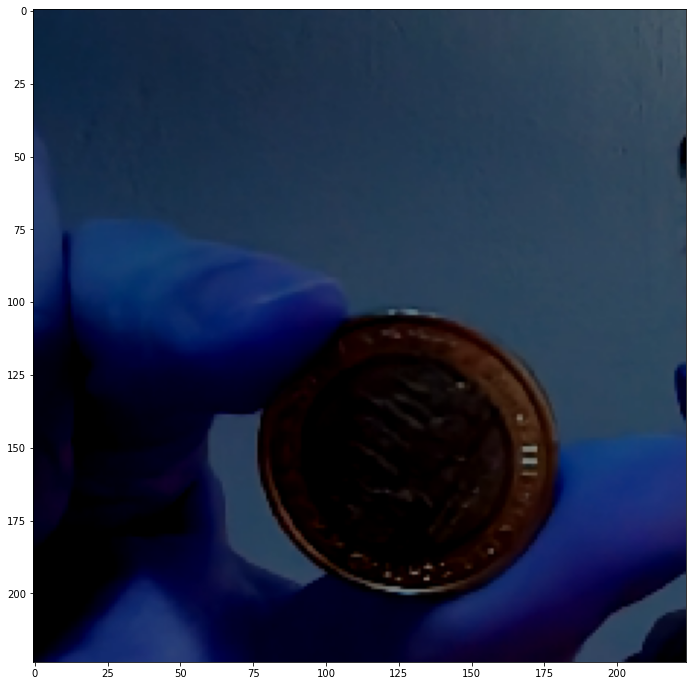

In [31]:
image4d_4 = np.expand_dims(np.array(X_test[58]), axis = 0)
processed_image4 = keras.applications.vgg16.preprocess_input(image4d_4)
plt.imshow(np.array(processed_image4[0,:,:,:], dtype='i8'))

In [32]:
prediction1 = vgg_model.predict(processed_image4)
label_vgg1 = keras.applications.imagenet_utils.decode_predictions(prediction1)
label_vgg1

1/1 [==============================] - 0s 358ms/step


[[('n02877765', 'bottlecap', 0.13371721),
  ('n03692522', 'loupe', 0.076395966),
  ('n03935335', 'piggy_bank', 0.056626692),
  ('n03825788', 'nipple', 0.044791937),
  ('n03657121', 'lens_cap', 0.041293416)]]

In [33]:
base = keras.applications.vgg16.VGG16(weights="imagenet", input_shape=(224, 224, 3), include_top=False)

58889256/58889256 [==============================] - 36s 1us/step


In [35]:
for layer in base.layers:
    layer.trainable = False

In [37]:
K.clear_session()
model = keras.models.Sequential([
    
    # Base model
    base,
    
    # Flatten layer
    keras.layers.Flatten(),
    
    #keras.layers.Dropout(.5),
    # fc1 fully connected layer
    keras.layers.Dense(units=30, activation=keras.activations.relu, name='fc1'),
    
    # fc2 fully connected layer
    keras.layers.Dense(units=15, activation=keras.activations.relu, name='fc2'),
    
    # output layer
    keras.layers.Dense(units=12, activation=keras.activations.softmax, name='output')

])

In [48]:
model.compile(loss=keras.losses.categorical_crossentropy,
                  optimizer=keras.optimizers.Adam(learning_rate=0.008),
                 metrics=keras.metrics.Accuracy())

In [52]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 7, 7, 512)         14714688  
                                                                 
 flatten (Flatten)           (None, 25088)             0         
                                                                 
 fc1 (Dense)                 (None, 30)                752670    
                                                                 
 fc2 (Dense)                 (None, 15)                465       
                                                                 
 output (Dense)              (None, 12)                192       
                                                                 
Total params: 15,468,015
Trainable params: 753,327
Non-trainable params: 14,714,688
_________________________________________________________________


In [45]:
# Early stopping:
early_stop = keras.callbacks.EarlyStopping(
    monitor = 'val_loss', #the thing we are monitoring
    min_delta = 0.0005, #the minimum change in the quantity that we want for the model to train for another epoch
    patience = 10, #number of epochs with no improvement needed for the model to stop
    verbose = 1, #0 is silent, 1 means a message is displayed when something happens
    mode = 'auto',
    restore_best_weights=True
    #Bonus Exercise! More things to look up in the documentation:
    #restore_best_weights
    #baseline
)

In [ ]:

hist1 = model.fit(X_train, y_train,
                epochs = 50, # 1 epoch is 1 iteration over entire X and y data
                batch_size = 100, # number of samples per gradient update
                validation_split = 0.2,
                callbacks = [early_stop])

Epoch 1/50
10/10 [==============================] - 350s 36s/step - loss: 0.2642 - accuracy: 0.2519 - val_loss: 1.0066 - val_accuracy: 0.1338
Epoch 2/50
10/10 [==============================] - 363s 37s/step - loss: 0.2311 - accuracy: 0.2402 - val_loss: 0.9026 - val_accuracy: 0.1369
Epoch 3/50
10/10 [==============================] - 332s 34s/step - loss: 0.2109 - accuracy: 0.2477 - val_loss: 1.0426 - val_accuracy: 0.1373
Epoch 4/50
10/10 [==============================] - 316s 32s/step - loss: 0.1821 - accuracy: 0.2484 - val_loss: 0.8412 - val_accuracy: 0.1404
Epoch 5/50
10/10 [==============================] - 335s 34s/step - loss: 0.1513 - accuracy: 0.2562 - val_loss: 0.9696 - val_accuracy: 0.1452
Epoch 6/50
10/10 [==============================] - 340s 35s/step - loss: 0.1532 - accuracy: 0.2588 - val_loss: 1.1460 - val_accuracy: 0.1556
Epoch 7/50
10/10 [==============================] - 341s 35s/step - loss: 0.1443 - accuracy: 0.2710 - val_loss: 0.8181 - val_accuracy: 0.1573
Epoch 

In [68]:
# old model:
model.load_weights('../models/checkpoint_friday')

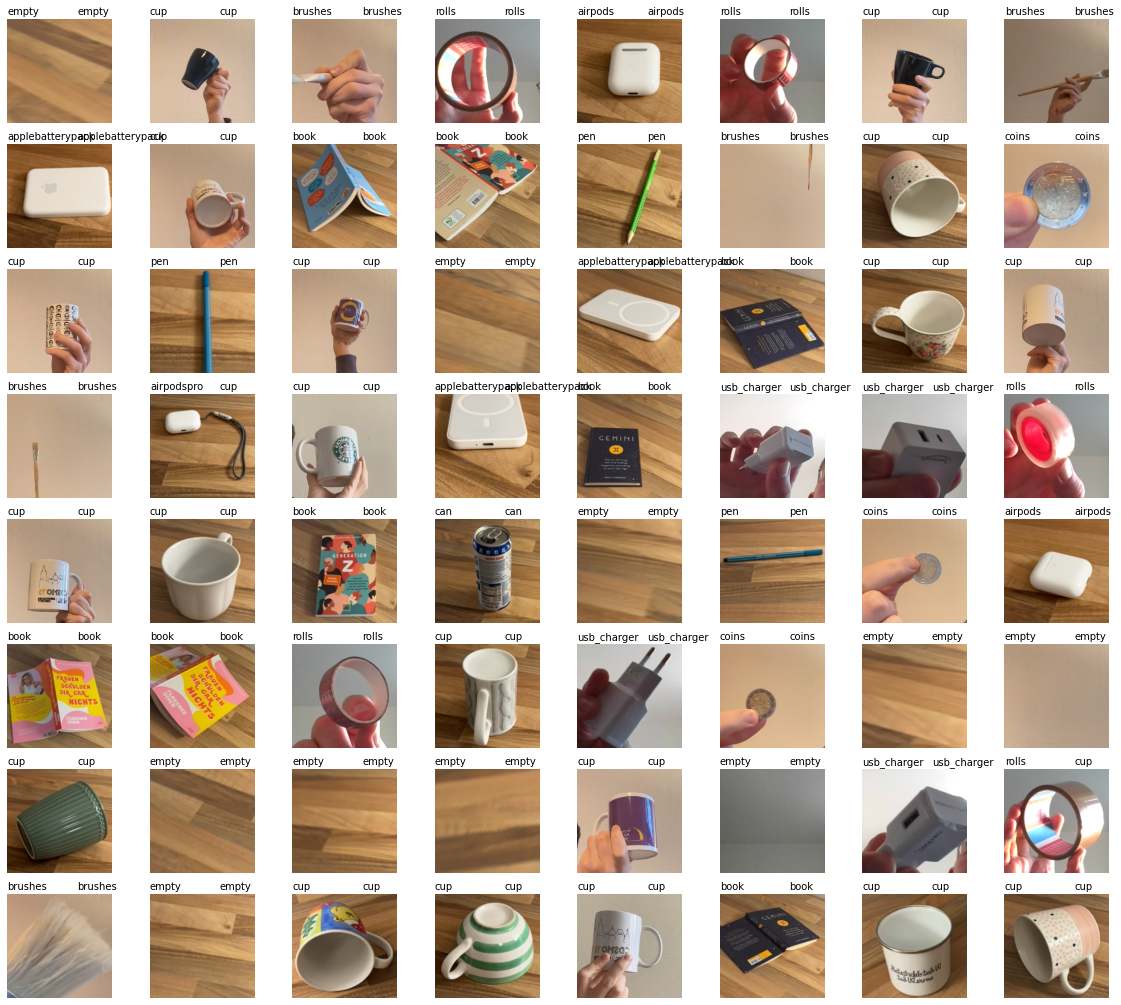

In [76]:
plt.rcParams['figure.figsize'] = [20, 18]

size = 8
offset = 100
cls = np.array(classes)

for i in range(size*size):
    plt.subplot(size, size, i+1)
    plt.imshow(X_test[i+offset])
    plt.axis('off')
        
    binary = np.array(np.rint(y_test[i+offset]), dtype='bool')
    binary = np.reshape(binary, (12))
    if cls[binary]:
        true = cls[binary][0]
    else:
        true = 'none'
    plt.text(0, -10, true) # displays y-values in each subplot
        
    binary = np.array(np.rint(model.predict(X_test[i+offset:i+1+offset,:,:,:], verbose=0)), dtype='bool')
    binary = np.reshape(binary, (12))
    if cls[binary]:
        pred = cls[binary][0]
    else:
        pred = 'none'
    plt.text(150, -10, pred)

In [17]:
import sys
import logging
import os
import cv2
from utils import write_image, key_action, init_cam


In [ ]:
cls = np.array(classes)

webcam = init_cam(640, 480)
key = None

try:
    # q key not pressed 
    while key != 'q':
        # Capture frame-by-frame
        ret, frame = webcam.read()
        # fliping the image 
        frame = cv2.flip(frame, 1)
        #frame = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
        frame = np.expand_dims(frame, 2)
        # draw a [224x224] rectangle into the frame, leave some space for the black border 
        offset = 2
        width = 224
        x = 160
        y = 120
        cv2.rectangle(img=frame, 
                      pt1=(x-offset,y-offset), 
                      pt2=(x+width+offset, y+width+offset), 
                      color=(0, 0, 0), 
                      thickness=2
        )     

        # get key event
        key = key_action()

        if key == 'space':
            # write the image without overlay
            # extract the [224x224] rectangle out of it
            image = frame[y:y+width, x:x+width, :]
            prediction = model.predict(np.expand_dims(image, 0))
            prediction = np.floor(prediction/np.max(prediction))
            binary = np.array(prediction, dtype='bool')
            binary = np.reshape(binary, (12))
            if cls[binary]:
                pred = cls[binary][0]
            else:
                pred = 'none'
            print(pred)

        # disable ugly toolbar
        cv2.namedWindow('frame', flags=cv2.WINDOW_GUI_NORMAL)              

        # display the resulting frame
        cv2.imshow('frame', frame)            

finally:
    # when everything done, release the capture
    logging.info('quit webcam')
    webcam.release()
    cv2.destroyAllWindows()

In [30]:
prediction = model.predict(np.expand_dims(image, 0))
prediction = np.floor(prediction/np.max(prediction))
binary = np.array(prediction, dtype='bool')
binary

#max normalizing, casting to boolean anpassen, so dass das maximum als true gecastet wird (dann gibt es kein none mehr)

1/1 [==============================] - 0s 31ms/step


array([[False, False, False, False, False, False, False, False, False,
        False, False,  True]])